In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def stock_monte_carlo(NUM_SIM, s0, mu, sigma, N=1260):
    result = []
    
    ##Perform NUM_SIM simulations, average to compute expected stock price trajectory
    ##Monte-Carlo simulation to approximate deterministic solution to stock price stochastic equation
    
    for sim in range(NUM_SIM):
        prices = [s0]
        
        ##Simulate stock price fluctuation over N days
        
        for data_point in range(N):
            
            #Compute solution to stochastic differential using Ito's Lemma to determine stock price at a given time
            #Generate points using previous estimate; sampling from standard normal to emulate Wiener process
            stock_price = prices[-1] * np.exp((mu - 0.5*sigma**2) + sigma * np.random.normal())
            prices.append(stock_price)
        
        result.append(prices)
    
    #Each row represents data per simulation, each column represents day in range [1, N]
    #Transpose to get each row as day in range [1, N], each column as data per simulation
    simulation_data = pd.DataFrame(result)
    simulation_data = simulation_data.T
    
    #Compute expected stock price across all simulations
    simulation_data['mean'] = simulation_data.mean(axis=1)
    
    return simulation_data[simulation_data.columns.difference(['mean'])], simulation_data[['mean']]

In [3]:
all_sim, expectation = stock_monte_carlo(1000, 50, 0.0002, 0.01)
all_sim

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
1,50.058347,49.624005,49.267610,50.985954,49.899784,50.524146,50.306624,50.768616,48.588739,49.250555,...,49.666639,50.135771,49.863486,50.122565,49.909750,50.116396,50.863548,49.680084,50.026190,50.381468
2,50.358930,49.167789,48.772917,50.669985,49.618548,50.548611,49.434923,50.516018,48.599269,48.335345,...,49.904660,50.777521,50.241923,49.586859,49.330828,50.827203,50.286180,49.980253,49.627213,50.639992
3,51.152393,49.390268,48.875902,50.020614,49.731060,50.463542,49.894602,51.049485,48.480742,48.457572,...,49.909192,50.227166,50.126559,49.909366,48.789088,50.503551,50.935574,50.470666,48.930562,50.597386
4,51.493860,49.367379,49.261145,49.802518,50.180678,49.533281,50.271449,50.727498,49.258906,48.327589,...,49.952975,50.387967,49.792611,50.226496,48.447193,50.300039,50.526095,50.466528,49.379726,51.099171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,64.775036,50.310106,39.903103,88.038745,41.448737,45.355904,59.410873,47.115876,55.335332,65.955178,...,79.055216,41.551263,54.115395,58.481507,59.990887,75.033752,92.495988,151.672440,50.835944,69.211506
997,65.665879,49.562433,39.947639,87.608883,41.601162,44.568648,59.307443,47.364923,56.226930,65.559877,...,78.809495,40.998493,53.900784,58.224910,59.754862,73.672258,94.466908,152.334947,51.707436,68.837824
998,65.205941,50.180242,40.097025,87.501819,41.402491,45.138791,58.746972,47.149835,55.298829,65.151985,...,77.478578,40.916135,53.985740,57.955683,59.637436,73.798066,94.813567,151.715197,51.904153,69.835010
999,65.523578,49.966227,40.458761,87.997947,41.714170,45.466162,58.196025,46.745684,56.049657,66.513791,...,77.404973,41.037150,53.820420,58.021201,59.573204,74.441878,95.889940,150.232541,52.130630,70.013208


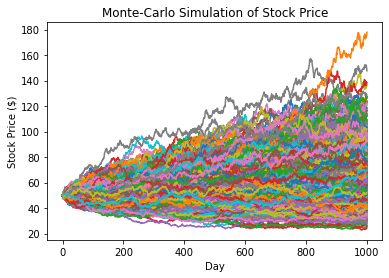

In [4]:
plt.plot(all_sim)
plt.title('Monte-Carlo Simulation of Stock Price Over 5 Year Period')
plt.xlabel('Day')
plt.ylabel('Stock Price ($)')
plt.show()

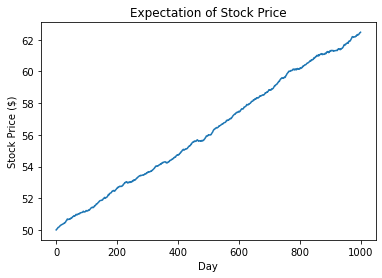

In [5]:
plt.plot(expectation)
plt.title('Expectation of Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price ($)')
plt.show()